In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
from wordcloud import WordCloud
import numpy as np 

In [2]:
    df = pd.read_csv('G:/Downloads/globalterrorism.csv',encoding="ISO-8859-1")

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### Rename Columns

In [5]:
df.rename(columns={"iyear":"year","imonth":'month',"iday":'day',"country_txt":'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

+ columns that important for analysis

In [6]:
df = df[['year','month','day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
df.head()

,year,month,day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


### Check missing values

In [8]:
def get_cols_with_missing_values(DataFrame):
    missing_na_cols = (DataFrame.isnull().sum())
    return missing_na_cols[missing_na_cols>0]
    

In [9]:
print(get_cols_with_missing_values(df))

state           421
city            434
latitude       4556
longitude      4557
Killed        10313
Wounded       16311
Target          636
Summary       66129
Motive       131130
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [11]:
print("Country with the most attack: ", df['Country'].mode()[0])
print('Groups with most attak: ',df['Group'].value_counts().index[1]) ## as first entry is "unknown"
print('State with the most attak: ', df['state'].mode()[0])
print("Region with the most attak: ", df['Region'].mode()[0])
print("Target with the most attak: ",df['Target_type'].mode()[0])
print('Weapon used with the most attak: ', df['Weapon_type'].mode()[0])
print("month with the most attak: ",df['month'].mode()[0])
print("year with the most attak: ",df['year'].mode()[0])
print("day with the most attak: ",df['day'].mode()[0])


      

Country with the most attack:  Iraq
Groups with most attak:  Taliban
State with the most attak:  Baghdad
Region with the most attak:  Middle East & North Africa
Target with the most attak:  Private Citizens & Property
Weapon used with the most attak:  Explosives
month with the most attak:  5
year with the most attak:  2014
day with the most attak:  15


In [12]:
def plot_word_cloud(word):
    mywordcloud = WordCloud().generate(" ".join(word))
    plt.figure(figsize=(14,6))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    

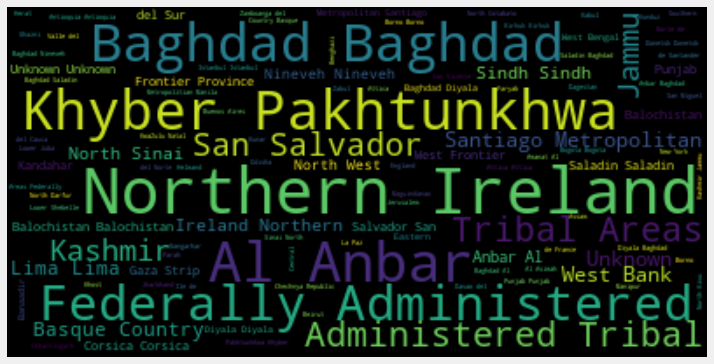

In [13]:
plot_word_cloud(df['state'].dropna(False))

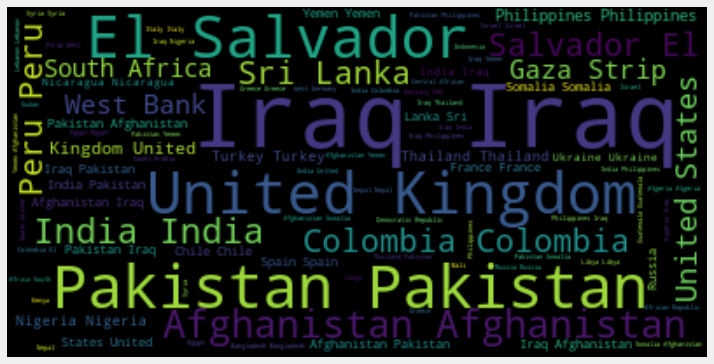

In [14]:
plot_word_cloud(df['Country'].dropna(False))

### num.of terrorist attack per year

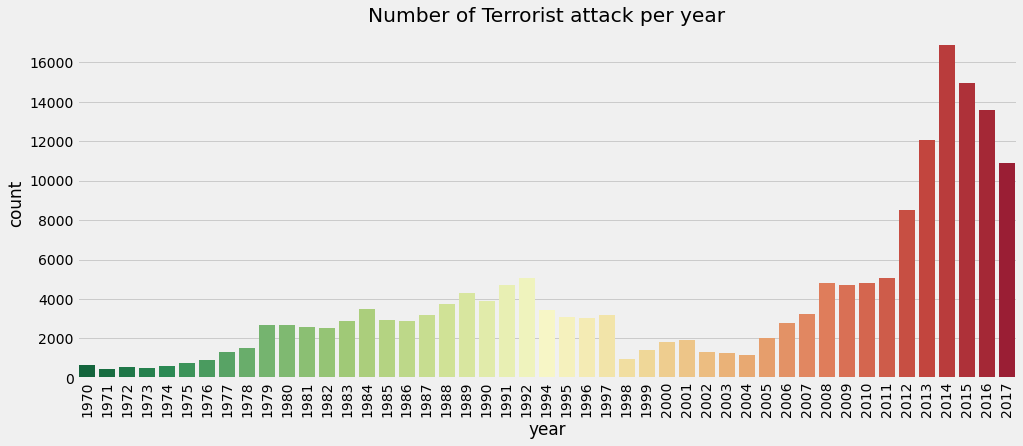

In [15]:
plt.subplots(figsize=(15,6))
sns.countplot(x='year',data=df,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Number of Terrorist attack per year')
plt.show()

In [16]:
#df.year.value_counts().dropna(False).sort_index()

# Terrorsit attack by region in each year

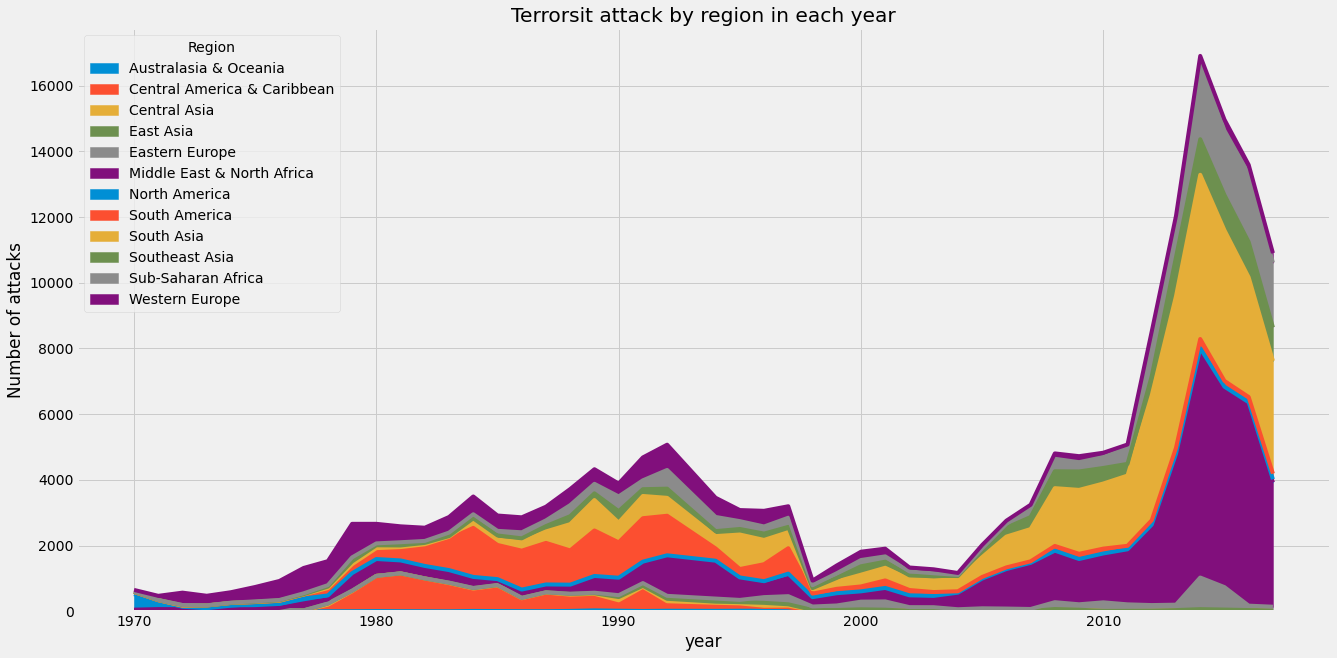

In [17]:
pd.crosstab(df.year,df.Region).plot(kind='area',figsize=(20,10))
plt.title("Terrorsit attack by region in each year")
plt.ylabel('Number of attacks')
plt.show()

In [18]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)

- Total casualties including killed

In [19]:
df['casualties'] = df['Wounded'] + df['Killed']

### the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize

In [20]:
top_40 = df.sort_values(by='casualties',ascending=False)[:40]
top_40

,year,month,day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualties
73126,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1384,8190,Passengers and crew members on American Airlin...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
73127,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1383,8191,Passengers and crew members on United Airlines...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
58841,1995,3,20,Japan,Tokyo,East Asia,Tokyo,35.689125,139.747742,Unarmed Assault,13,5500,Subway system,NaN,Aum Shinri Kyo,Transportation,Chemical,NaN,5513
68071,1998,8,7,Kenya,Nairobi,Sub-Saharan Africa,Nairobi,-1.285180,36.821107,Bombing/Explosion,224,4000,"United States Embassy in Nairobi, Kenya",08/07/1998: Suicide attackers detonated a vehi...,Al-Qaida,Government (Diplomatic),Explosives,Unknown,4224
133518,2014,6,12,Iraq,Saladin,Middle East & North Africa,Tikrit,34.621521,43.668377,Hostage Taking (Kidnapping),1570,0,Soldiers,06/12/2014: Assailants abducted approximately ...,Islamic State of Iraq and the Levant (ISIL),Military,Firearms,The Islamic State of Iraq and the Levant (ISIL...,1570
159773,2016,3,9,Iraq,Kirkuk,Middle East & North Africa,Taza Khurmatu,35.303047,44.329933,Bombing/Explosion,3,1500,Subdistrict,03/09/2016: Assailants fired 60 rockets holdin...,Islamic State of Iraq and the Levant (ISIL),Private Citizens & Property,Chemical,NaN,1503
61548,1996,1,31,Sri Lanka,Western,South Asia,Colombo,6.941837,79.861687,Bombing/Explosion,90,1272,Bank,NaN,Liberation Tigers of Tamil Eelam (LTTE),Business,Explosives,NaN,1362
55934,1994,4,13,Rwanda,Kigali,Sub-Saharan Africa,Gikoro,-1.932787,30.332456,Armed Assault,1180,0,Group of Tutsi Refugees inside Catholic Church,NaN,Hutu extremists,Private Citizens & Property,Firearms,NaN,1180
85682,2008,2,2,Chad,N'Djamena,Sub-Saharan Africa,N'Djamena,12.126693,15.028400,Armed Assault,160,1001,President Idriss Deby,2/2/2008: Chadian rebels attacked the capital ...,Rebels,Government (General),Firearms,The rebels were trying to topple President Idr...,1161
76953,2004,9,1,Russia,North Ossetia-Alania (Republic),Eastern Europe,Beslan,43.191626,44.541763,Hostage Taking (Barricade Incident),344,727,"School Number One (SNO) in Beslan, Russia",09/01/2004: A group of thirty to thirty-five a...,Riyadus-Salikhin Reconnaissance and Sabotage B...,Educational Institution,Explosives,Unknown,1071


In [21]:
heat = top_40.pivot_table(index='Country',columns='year',values='casualties')

In [22]:
heat.head()

year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,536.0,NaN,584.0
Chad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1161.0,NaN,NaN,NaN,NaN,NaN
Ethiopia,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.0,NaN
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# fill NAN by 0 
heat.fillna(0,inplace=True)

In [24]:
heat.head()

year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go 
heatmap = go.Heatmap(z=heat.values,x=heat.columns,y=heat.index,colorscale="Viridis",type = 'heatmap')
data = [heatmap]                 
fig = go.Figure(data=data)
py.iplot(fig,filename='heatmap',show_link=False)


In [26]:
df.Country.value_counts(ascending=False)[0:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

### Top countries effected by terrorist attack 

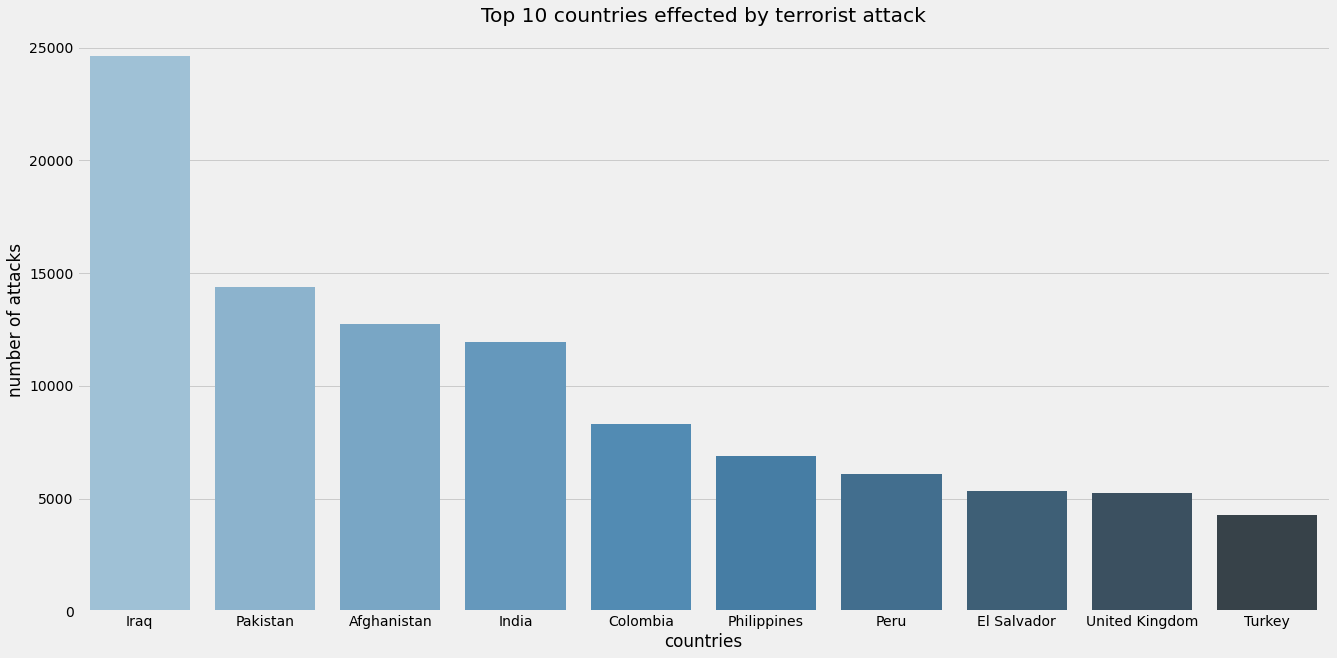

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x=df.Country.value_counts()[:10].index,y=df.Country.value_counts()[:10].values,palette='Blues_d')
plt.title("Top 10 countries effected by terrorist attack")
plt.xlabel('countries')
plt.ylabel('number of attacks')
plt.show()

### Map Analysis 

In [28]:
from  folium.plugins import MarkerCluster
import folium

In [29]:
# year filter
filteryear = df['year']==2001

In [30]:
df_filter = df[filteryear]

In [31]:
df_filter.head()

,year,month,day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualties
71650,2001,1,0,Colombia,Valle del Cauca,South America,Unknown,3.800889,-76.641271,Unknown,3,0,Farmers in Valle province,1/8/2001: Paramilitaries killed three farmers ...,Paramilitaries,Private Citizens & Property,Unknown,"Specific motive is unknown; however, authoriti...",3
71651,2001,1,1,Yemen,Adan,Middle East & North Africa,Aden,12.825647,44.846416,Bombing/Explosion,0,0,Aden Anglican Church,01/01/2001: The wall of an Anglican Church was...,Unknown,Religious Figures/Institutions,Explosives,Unknown,0
71652,2001,1,1,Colombia,Bogota,South America,Bogota district,4.598100,-74.076030,Hostage Taking (Kidnapping),0,0,Colombian Peasants,01/01/2001: The United Self-defense Forces of ...,United Self Defense Units of Colombia (AUC),Private Citizens & Property,Unknown,The peasants were taken until it could be prov...,0
71653,2001,1,1,Turkey,Istanbul,Middle East & North Africa,Istanbul,41.106178,28.689863,Bombing/Explosion,0,10,Civilians celebrating the new year,1/1/2001: An improvised explosive device went ...,Unknown,Private Citizens & Property,Explosives,"Specific motive is unknown; however, sources s...",10
71654,2001,1,1,Algeria,Djelfa,Middle East & North Africa,Djelfa,34.666667,3.250000,Unknown,5,1,An Algerian family in Djelfa,"1/1/2000: Unknown perpetrators, believed to be...",Algerian Islamic Extremists,Private Citizens & Property,Unknown,Part of a campaign by Islamic extremists to de...,6


In [32]:
get_cols_with_missing_values(df_filter)

state         2
latitude     23
longitude    23
Motive        4
dtype: int64

In [33]:

location = df_filter.loc[:,'city':'longitude']
location.dropna(inplace=True) # Drop null in df_filter for langitude and latitude only
location

,city,latitude,longitude
71650,Unknown,3.800889,-76.641271
71651,Aden,12.825647,44.846416
71652,Bogota district,4.598100,-74.076030
71653,Istanbul,41.106178,28.689863
71654,Djelfa,34.666667,3.250000
...,...,...,...
73551,N'dalatando,-9.298851,14.916506
73552,Mbale,1.078444,34.181006
73553,Kanthol,33.322586,74.505312
73554,Grozny,43.320229,45.654491


In [34]:
locationlist = location.values.tolist()
locationlist

[['Unknown', 3.8008889999999997, -76.641271],
 ['Aden', 12.825647, 44.846416],
 ['Bogota district', 4.5981, -74.07603],
 ['Istanbul', 41.106178, 28.689863],
 ['Djelfa', 34.666667, 3.25],
 ['Aden', 12.825647, 44.846416],
 ['Vranje', 42.55, 21.9],
 ['Glendale', 42.738006, -123.417103],
 ['Istanbul', 41.106178, 28.689863],
 ['Zurich', 47.36865, 8.539182],
 ['Keshpur', 22.556913, 87.461815],
 ['Yolombo', 6.5984490000000005, -75.01155899999999],
 ['Laghouat', 33.80658, 2.878025],
 ['Bujumbura', -3.375828, 29.364107],
 ['Poonch', 33.767001, 74.092404],
 ['Srinagar', 34.08374, 74.789902],
 ['Argun', 43.3, 45.866667],
 ['Guatape', 6.23384, -75.1617],
 ['Ripon', 53.99211999999999, -1.5418120000000002],
 ['Bachi-Yurt', 43.219708000000004, 46.199835],
 ['Patrington', 53.683498, -0.013153],
 ['Unknown', 6.547306, -71.00223100000001],
 ['Barrancabermeja', 7.060051, -73.853115],
 ['Urus-Martan', 43.127544, 45.539974],
 ['Grozny', 43.320229, 45.654491],
 ['Tayeeglow', 4.010857, 44.513226],
 ['Chengue

In [35]:
map = folium.Map(location=[0,30],zoom_start=2)
#cluster marker 
markercluter = MarkerCluster().add_to(map)
for point in range(0,len(locationlist)):
    folium.Marker(location=[locationlist[point][1],locationlist[point][2]],
                 popup=locationlist[point][0]).add_to(markercluter)
map

***84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack***

# Now let us check out which terrorist organizations have carried out their operations in each country. A value count would give us the terrorist organizations that have carried out the most attacks. we have indexed from 1 as to negate the value of 'Unknown'

In [36]:
df.Group.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

In [37]:
test = df[df.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [38]:
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [39]:
terror_df_group = df.dropna(subset=['latitude','longitude'])

In [40]:
terror_df_group.drop_duplicates(subset=['Country','Group'],inplace=True)

In [41]:
terror_groups = df.Group.value_counts()[1:8].index.to_list()

In [42]:
terror_groups

['Taliban',
 'Islamic State of Iraq and the Levant (ISIL)',
 'Shining Path (SL)',
 'Farabundo Marti National Liberation Front (FMLN)',
 'Al-Shabaab',
 "New People's Army (NPA)",
 'Irish Republican Army (IRA)']

In [43]:
terror_df_group = terror_df_group.loc[terror_df_group.Group.isin(terror_groups)]

In [44]:
print(terror_df_group.Group.unique())

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [45]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'], 
                  terror_df_group.iloc[i]['Country'])).add_to(map)
map

# The Above map looks untidy even though it can be zoomed in to view the Country in question. Hence in the next chart, I have used Folium's Marker Cluster to cluster these icons. This makes it visually pleasing and highly interactive

In [46]:
m1 = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
marker_cluster = MarkerCluster(
    name='clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)
for i in range(0,len(terror_df_group)):
    marker=folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']]) 
    popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'],
                                          terror_df_group.iloc[i]['Country'])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
marker_cluster.add_to(m1)
folium.TileLayer('openstreetmap').add_to(m1)
#folium.TileLayer('Mapbox Bright').add_to(m1)
folium.TileLayer('cartodbdark_matter').add_to(m1)
folium.TileLayer('stamentoner').add_to(m1)
folium.LayerControl().add_to(m1)

m1

In [47]:
df.head()

,year,month,day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualties
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


# Total number of people killed in terror attacks 

In [48]:
killed = df.loc[:,'Killed']
print("Number of people killed in terror attacks: ", int(sum(killed.dropna())))

Number of people killed in terror attacks:  411868


In [49]:
# Let's look at what types of attacks these deaths were made of.

attackType = df.loc[:,'AttackType']

killing_with_attacktype = pd.concat([attackType,killed],axis=1)

In [50]:
killing_with_attacktype.head(8)

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0
5,Armed Assault,0
6,Assassination,0
7,Bombing/Explosion,0


In [51]:
## Create pivot table to count how many people killed from each attack 
type_killed_attack = killing_with_attacktype.pivot_table(columns='AttackType',values='Killed',aggfunc='sum')
type_killed_attack

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


In [52]:
type_killed_attack.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int32
 1   Assassination                        1 non-null      int32
 2   Bombing/Explosion                    1 non-null      int32
 3   Facility/Infrastructure Attack       1 non-null      int32
 4   Hijacking                            1 non-null      int32
 5   Hostage Taking (Barricade Incident)  1 non-null      int32
 6   Hostage Taking (Kidnapping)          1 non-null      int32
 7   Unarmed Assault                      1 non-null      int32
 8   Unknown                              1 non-null      int32
dtypes: int32(9)
memory usage: 124.0+ bytes


In [53]:
#Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killed], axis=1)

In [54]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


In [55]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

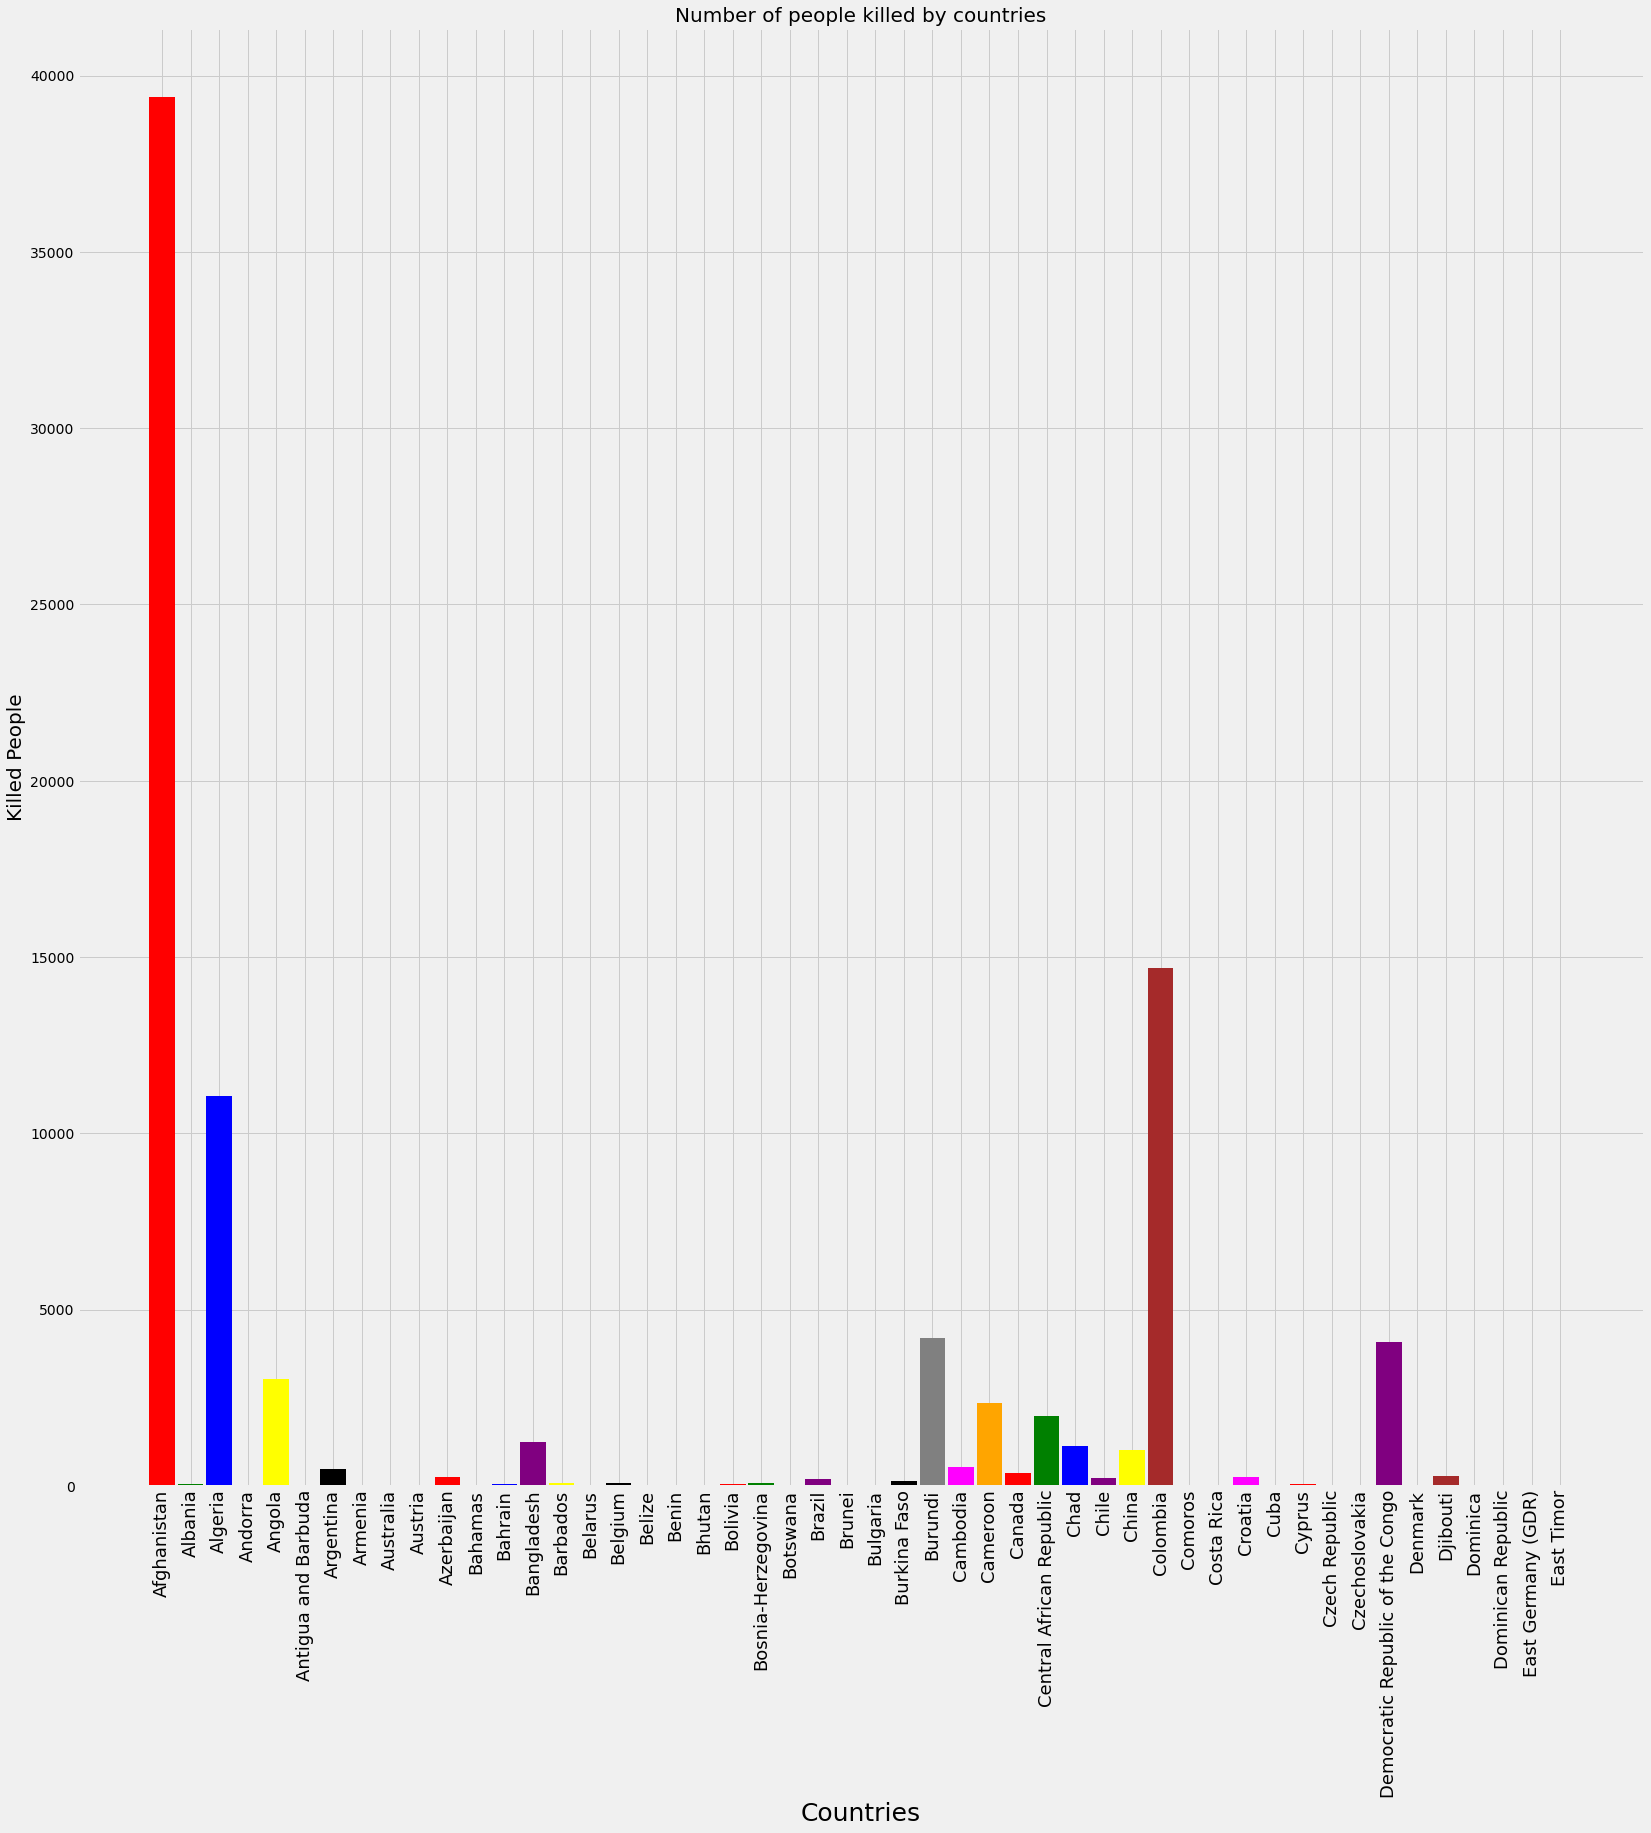

In [57]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 25)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()


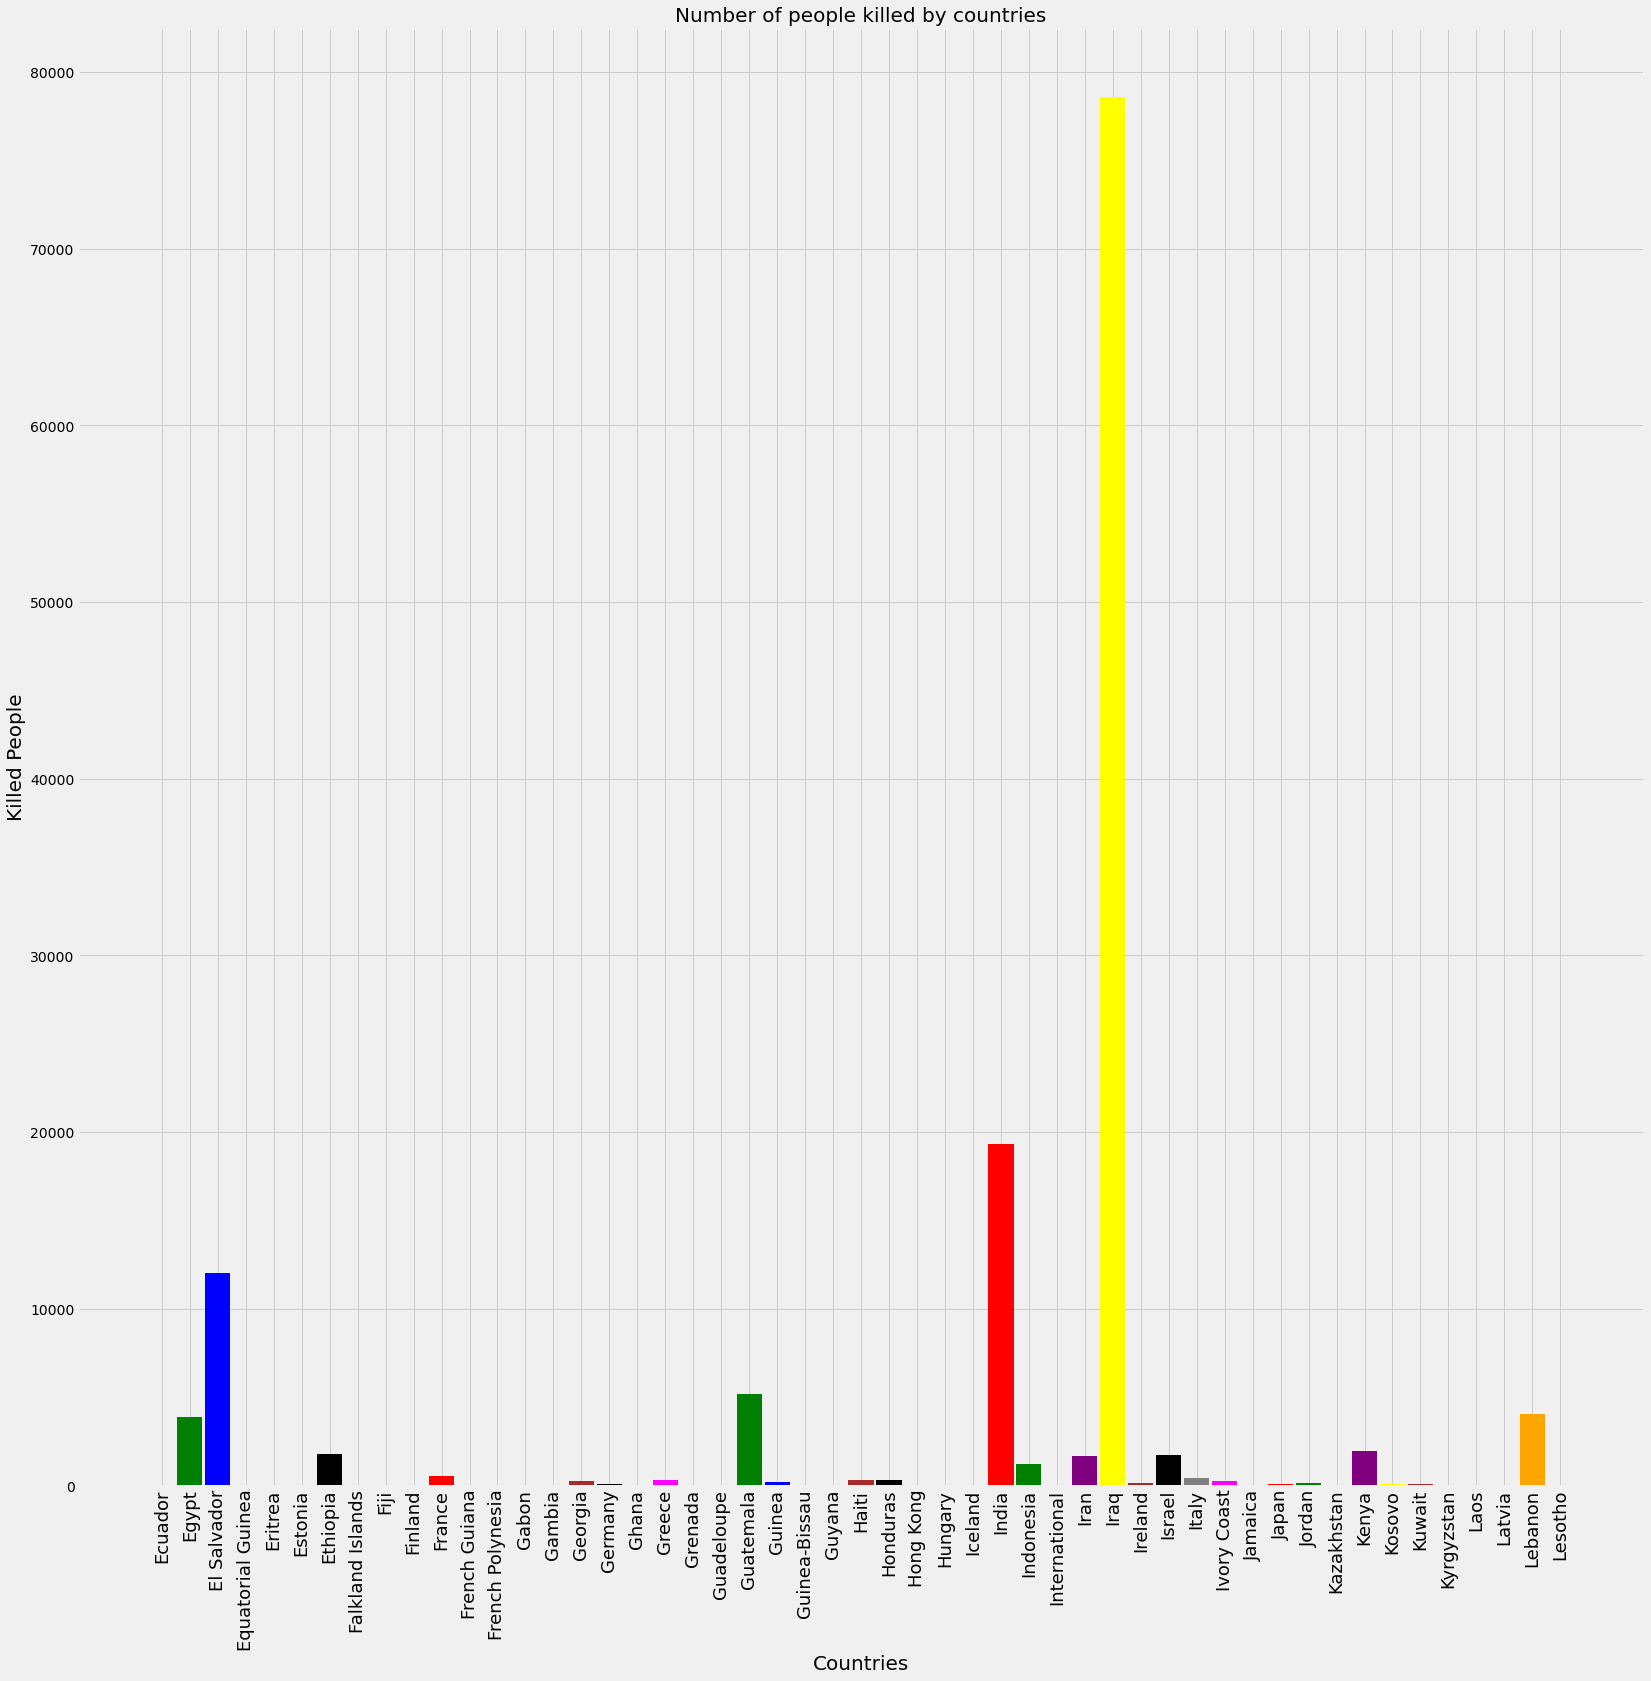

In [58]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()